In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("cleaned_cupid.csv",index_col=0)

/var/folders/f0/_f_gy0t91jqchv14f0hcl_gh0000gn/T/ipykernel_90193/1978324222.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_cupid.csv",index_col=0)


In [2]:
df['height'] = df['height'].replace('unspecified', pd.NA)
# Convert height to numeric, errors='coerce' will turn any non-numeric values into NaN
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Calculate median height excluding NaN
median_height = df['height'].median()

# Impute "unspecified" (now NaN) with the median height
df['height'].fillna(median_height, inplace=True)

In [3]:
cols = list(df.columns)
cols.remove("age")
cols.remove("height")
cols

['status',
 'sex',
 'orientation',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'income',
 'job',
 'offspring',
 'pets',
 'religion',
 'smokes',
 'speaks',
 'preference']

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

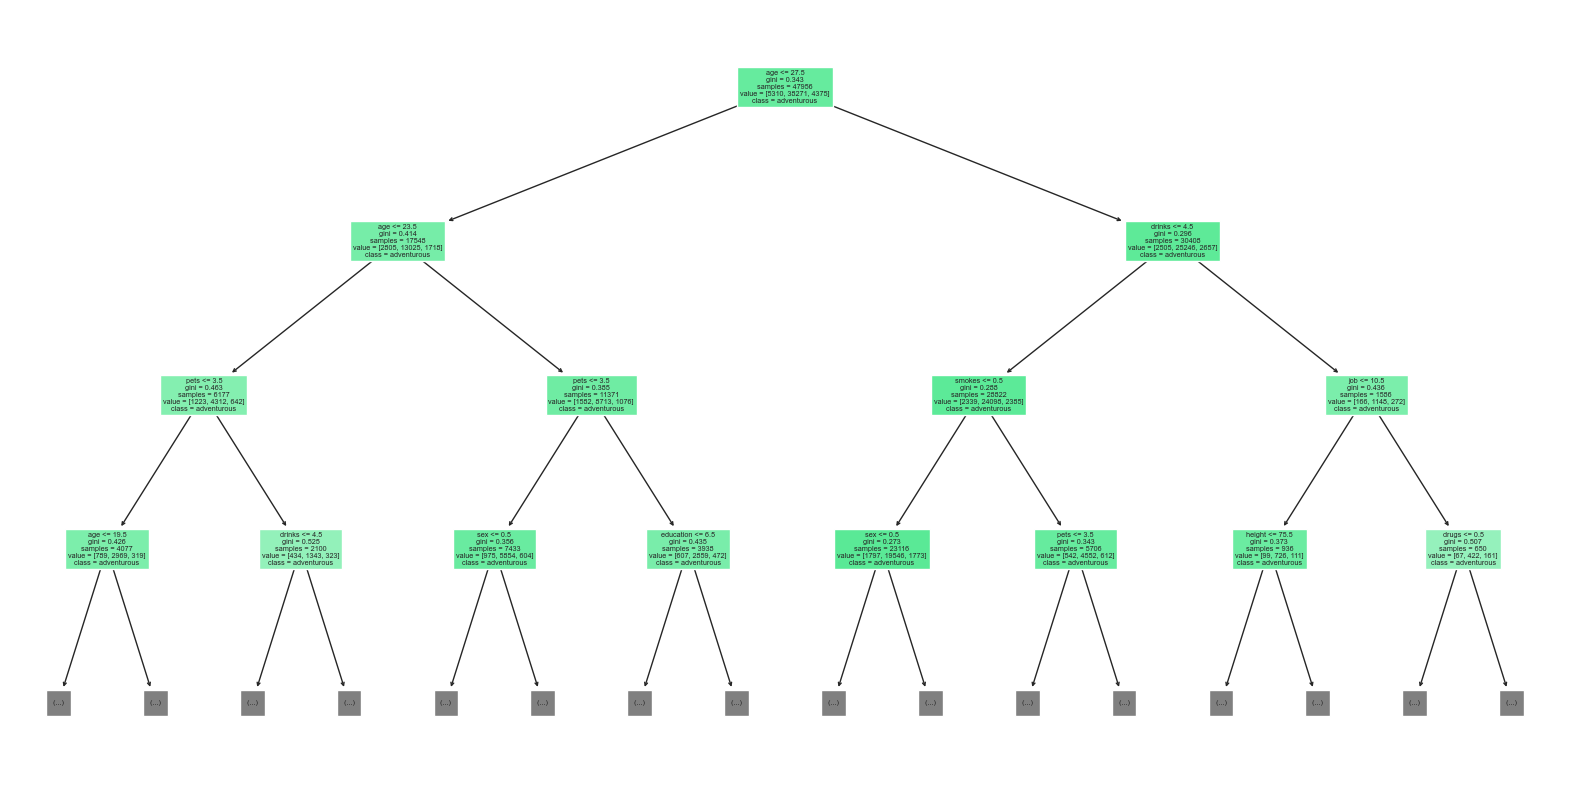

In [4]:

# Drop the first unnamed column as it seems to be an index
# df = df.drop(columns=["Unnamed: 0"])

# Handle missing values by dropping them for simplicity (alternative approaches could involve imputation)
df_clean = df

# Encoding categorical variables
label_encoders = {}
for column in cols:
    if df_clean[column].dtype == object and column != 'preference':
        le = LabelEncoder()
        df_clean[column] = le.fit_transform(df_clean[column])
        label_encoders[column] = le

# Splitting data into independent (X) and dependent (y) variables
X = df_clean.drop('preference', axis=1)
y = df_clean['preference']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=3)
plt.show()


In [5]:
clf.feature_importances_

array([0.12118275, 0.01483963, 0.00603218, 0.02154796, 0.05947544,
       0.04633031, 0.04803532, 0.03862346, 0.0576082 , 0.07035853,
       0.13567738, 0.02951978, 0.08631572, 0.04858304, 0.04576097,
       0.06905681, 0.03620676, 0.06484575])

In [6]:
X.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')

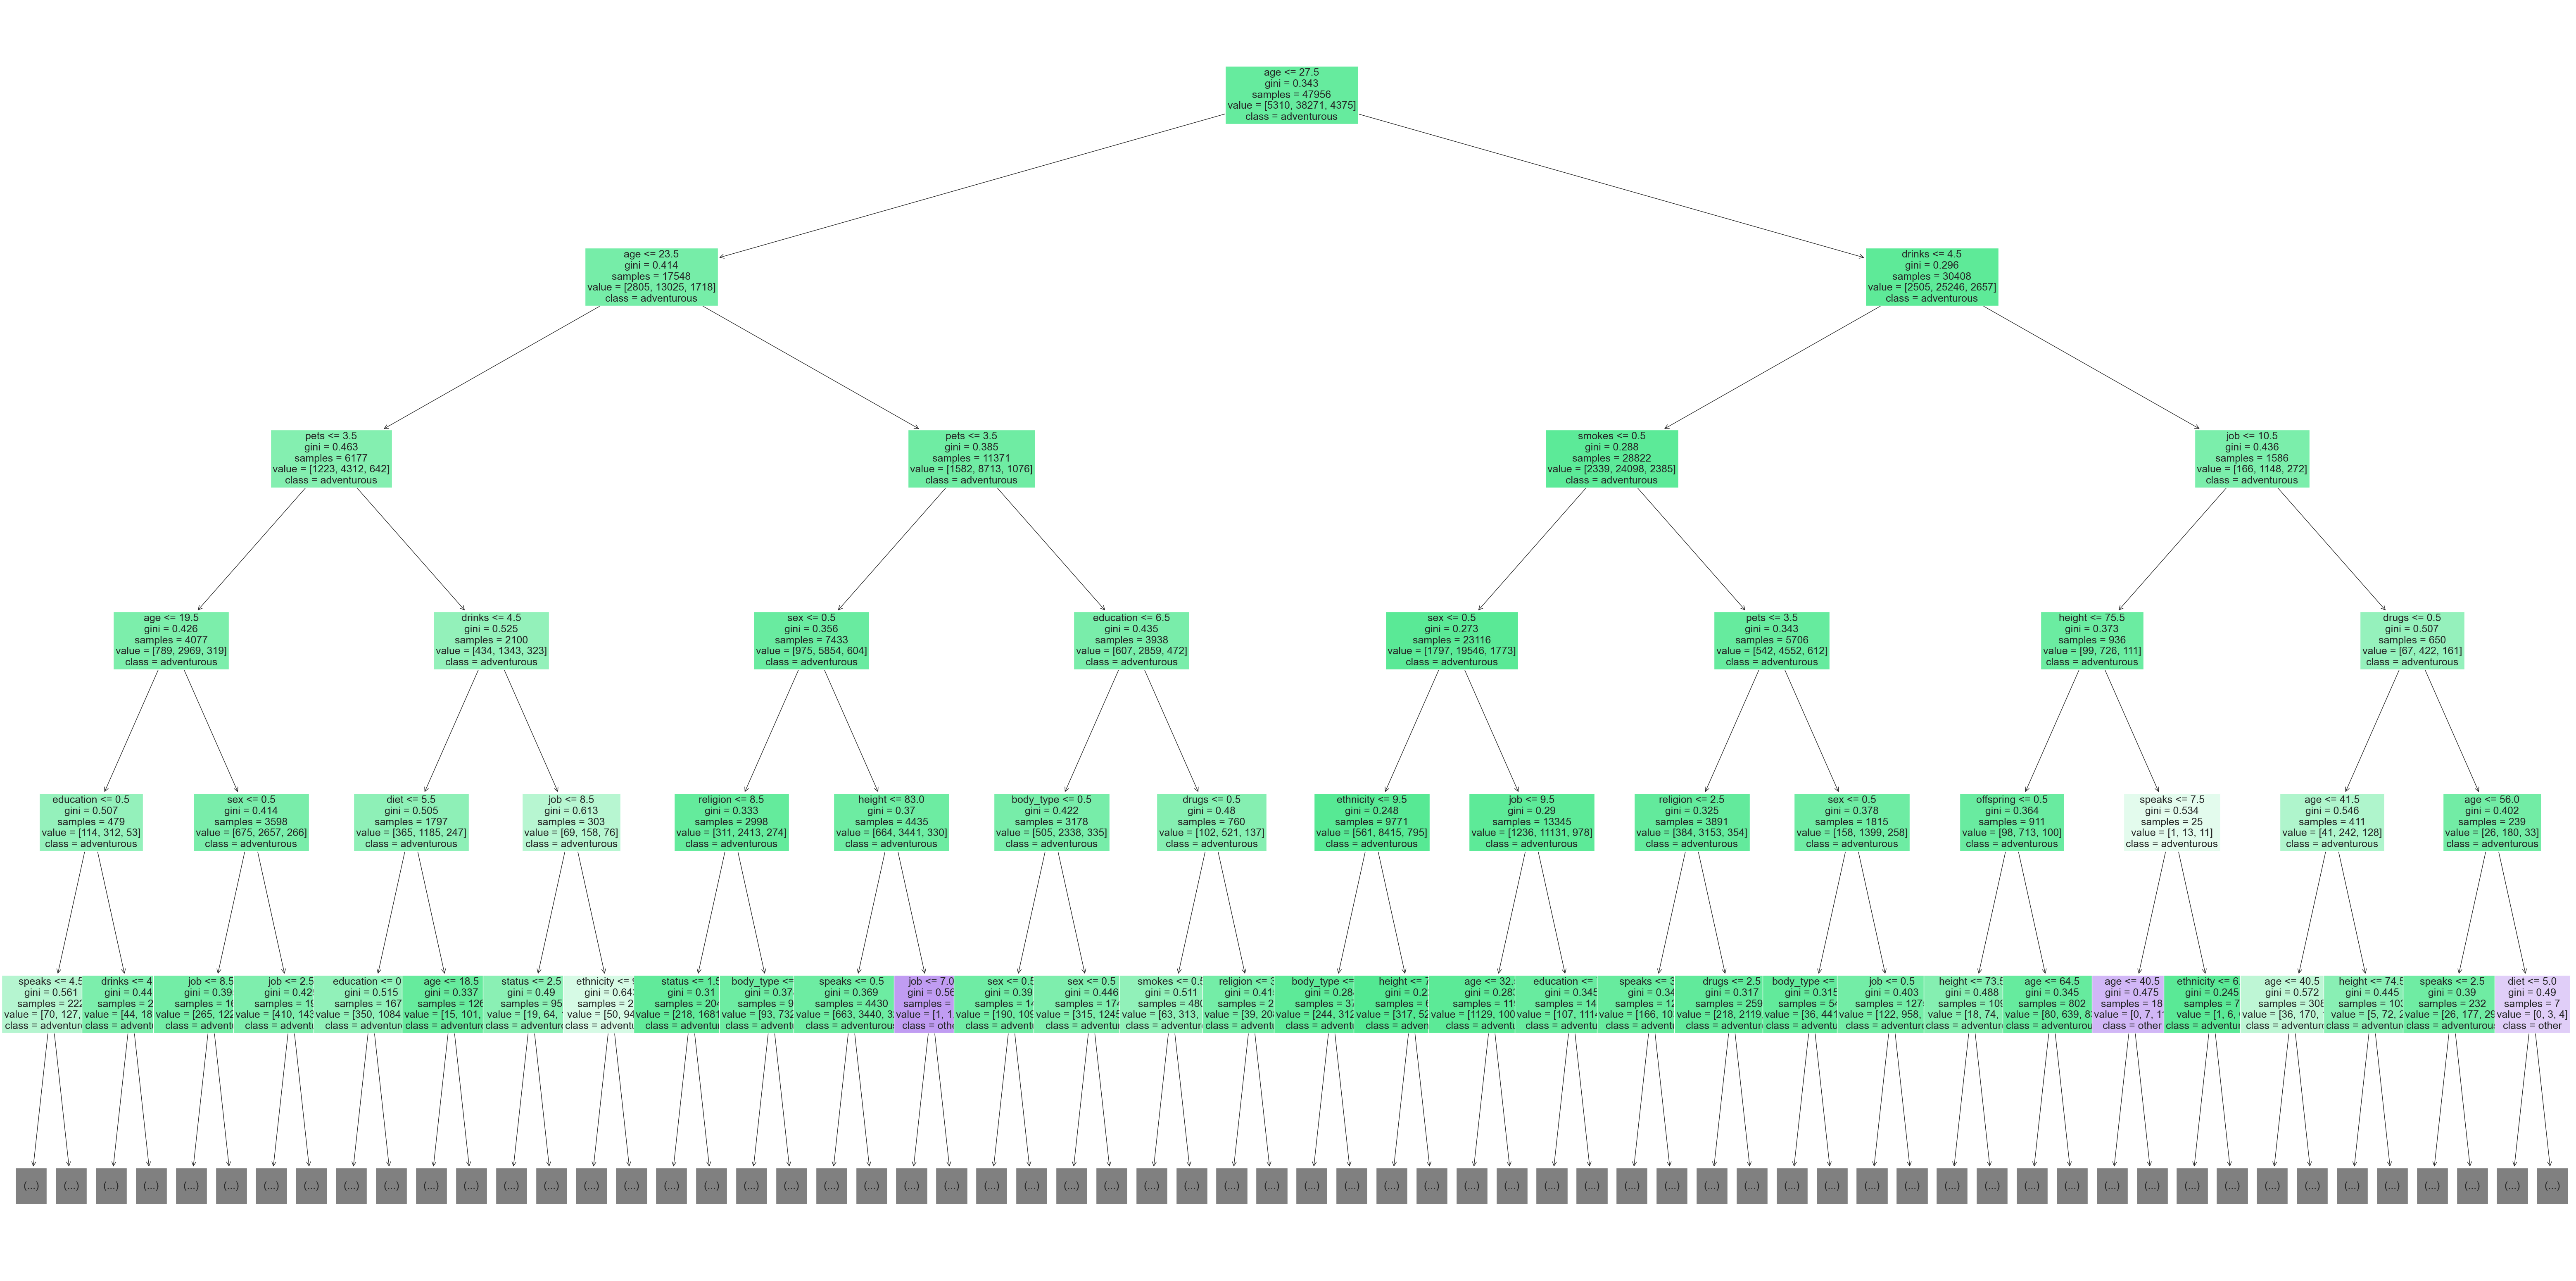

In [7]:

# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()


In [12]:
 import numpy as np
 np.average(clf.predict(X_test) == y_test)

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.6464553794829024

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

array([[ 234,  972,  145],
       [1168, 7355, 1003],
       [ 166,  785,  162]])

In [14]:
df["preference"].value_counts()

preference
adventurous    47797
academic        6661
other           5488
Name: count, dtype: int64

In [15]:
print(clf.tree_.max_depth)

36


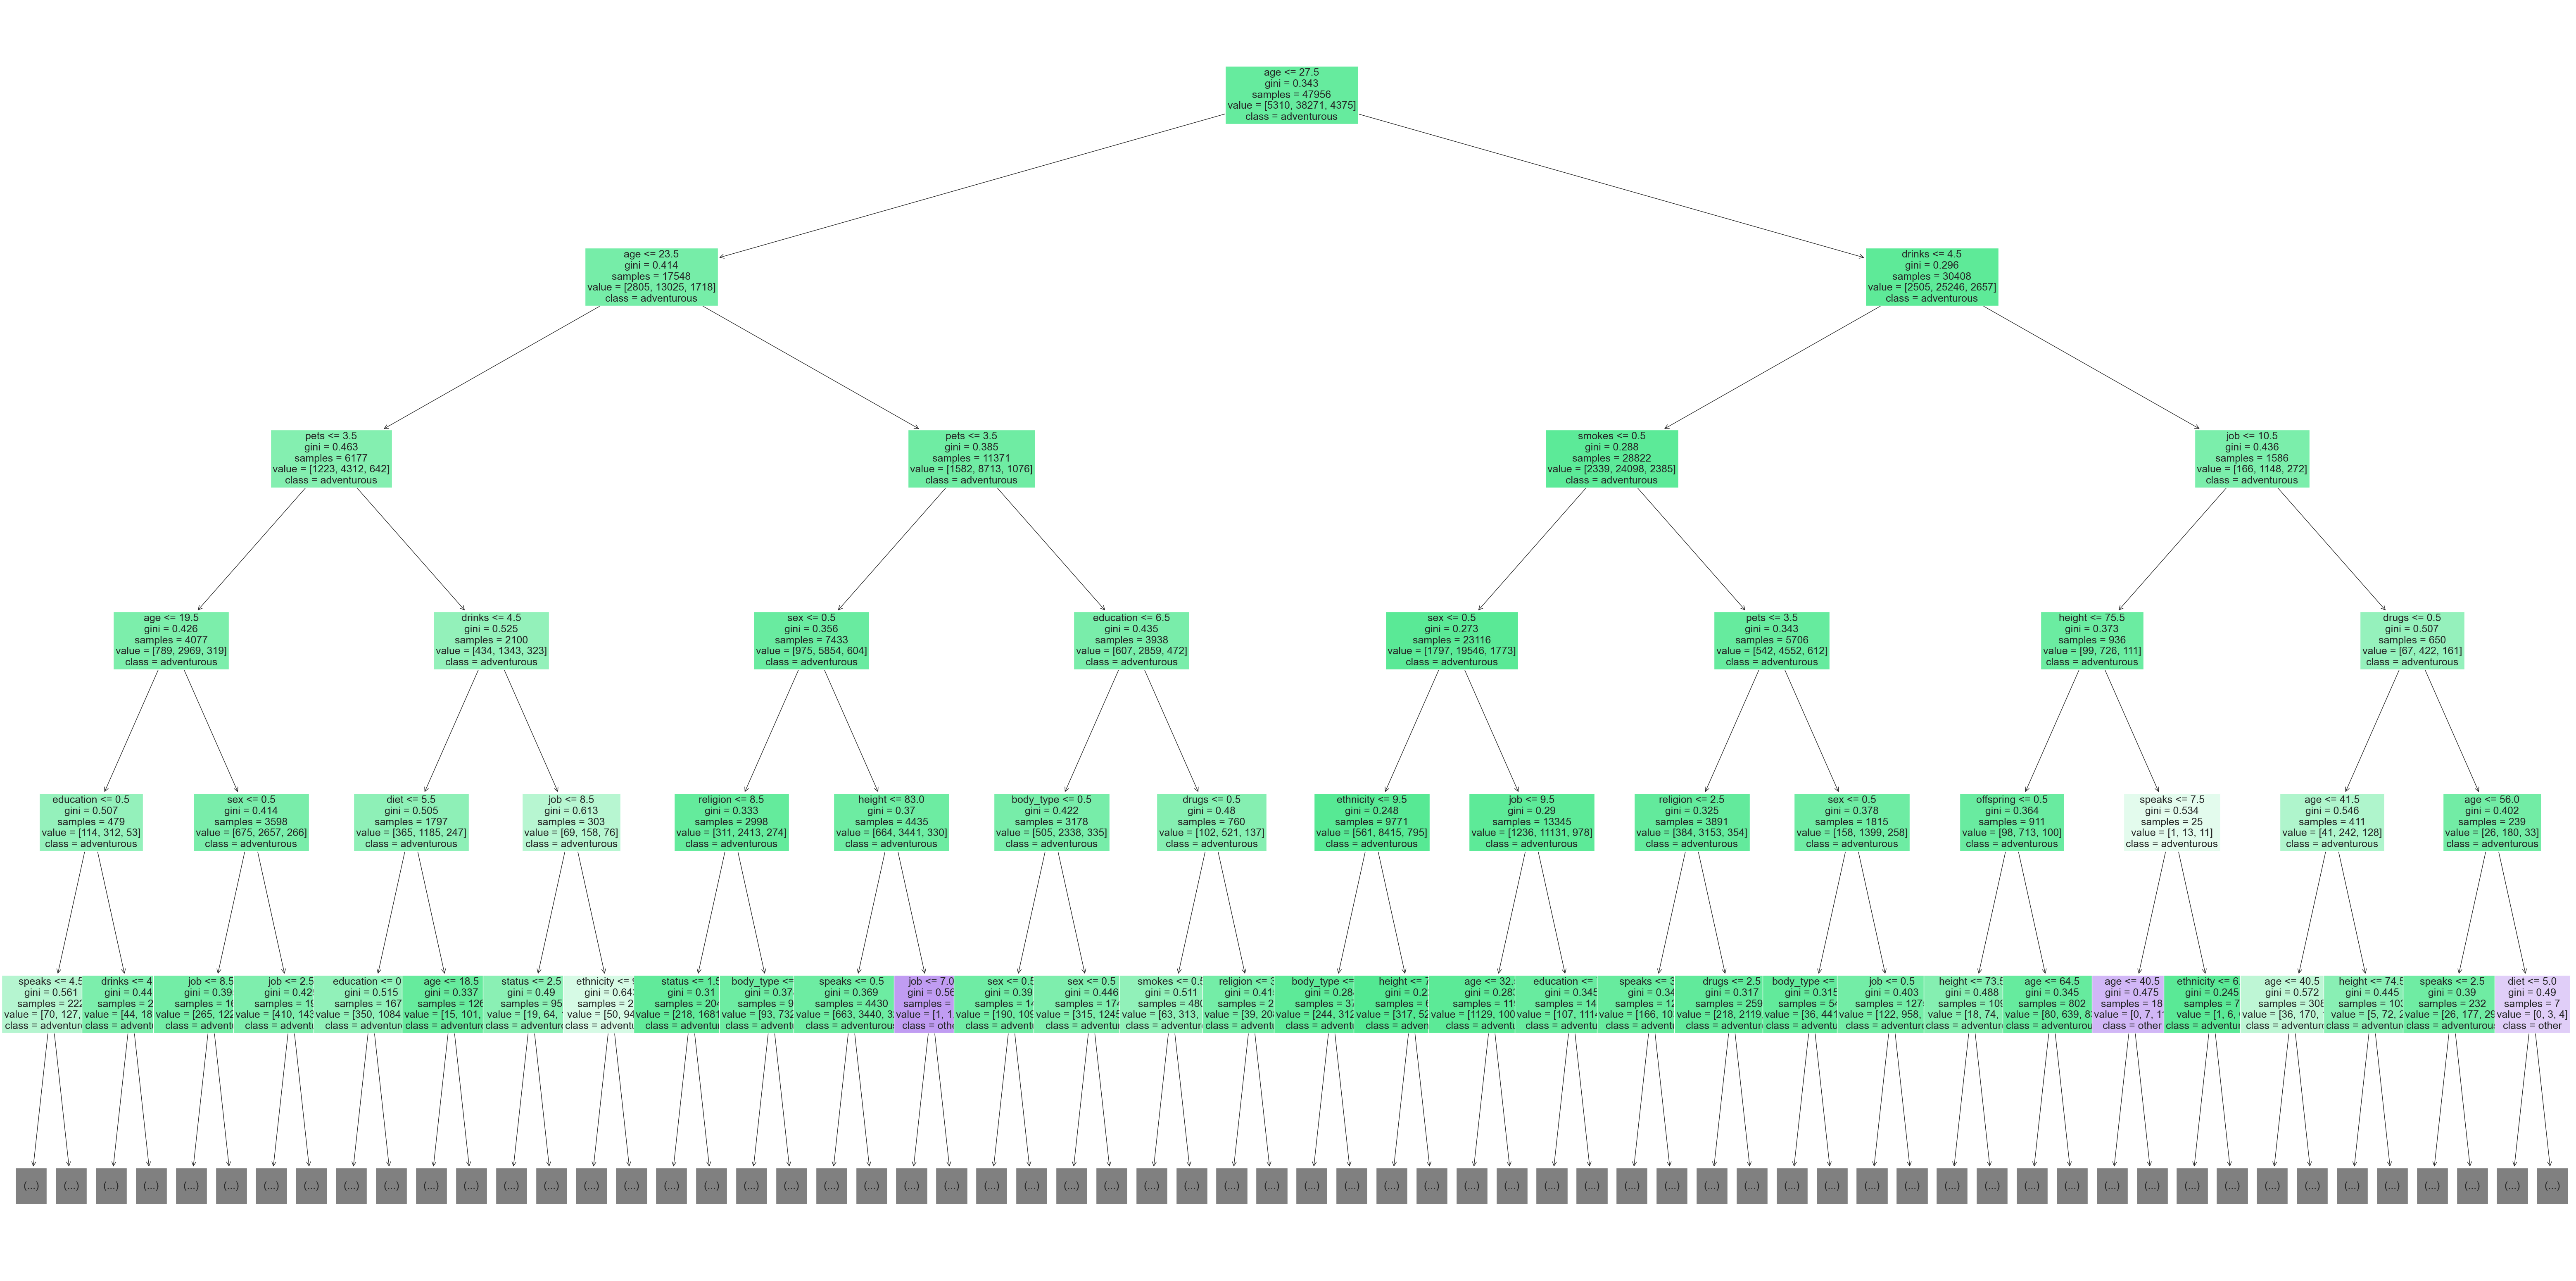

In [16]:

# Plotting the Decision Tree
plt.figure(figsize=(80,40))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, max_depth=5,fontsize=18)
plt.show()


/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

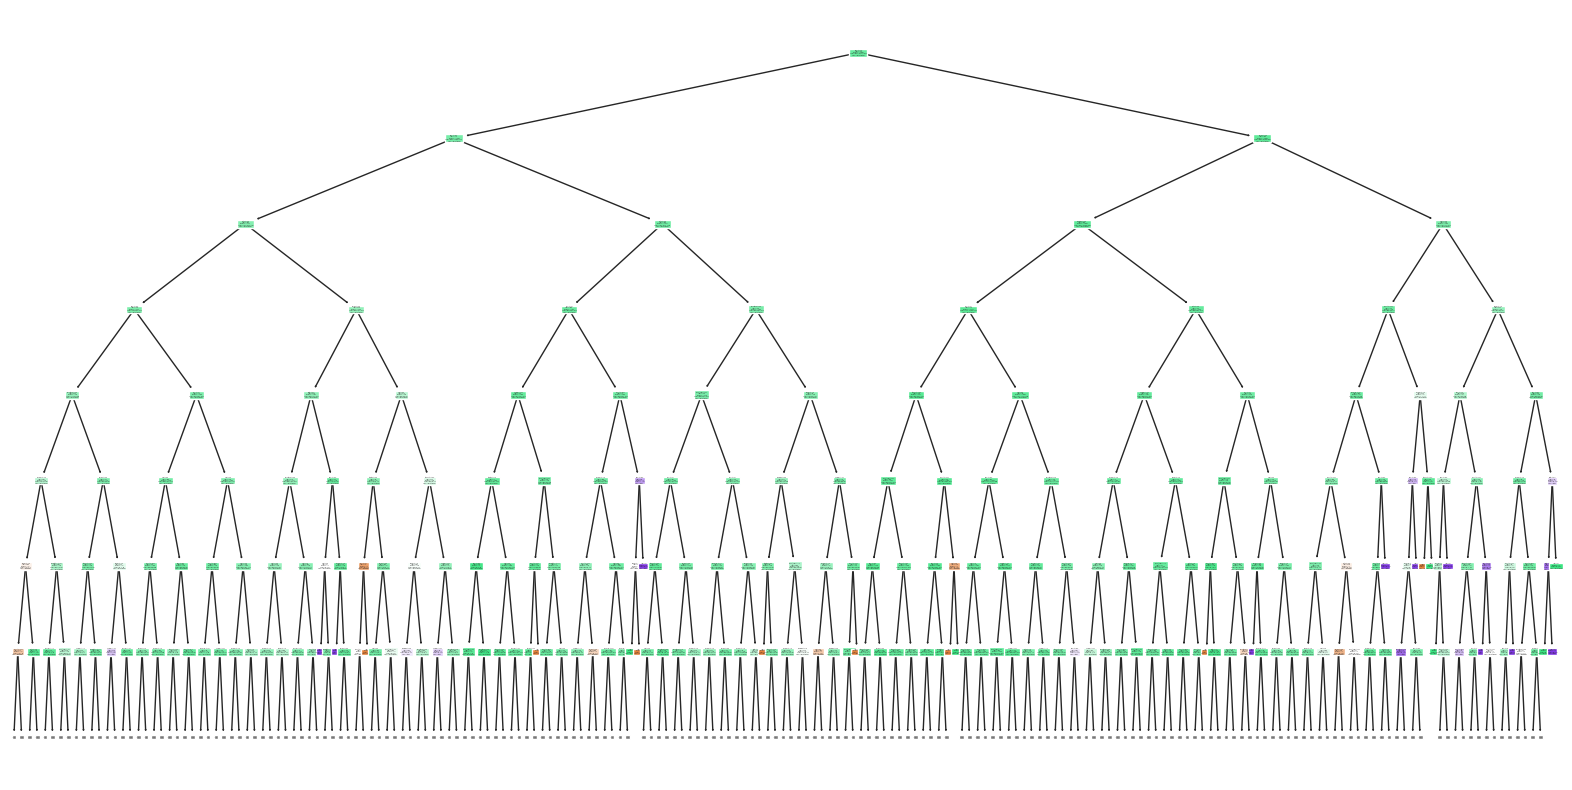

In [19]:
# Training the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=42,max_depth=7)
clf2.fit(X_train, y_train)

# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=7)
plt.show()


In [20]:
np.average(y_test==clf2.predict(X_test))

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7859883236030025

In [21]:
np.average(y_train==clf2.predict(X_train))

/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/adi/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.8077612811744099

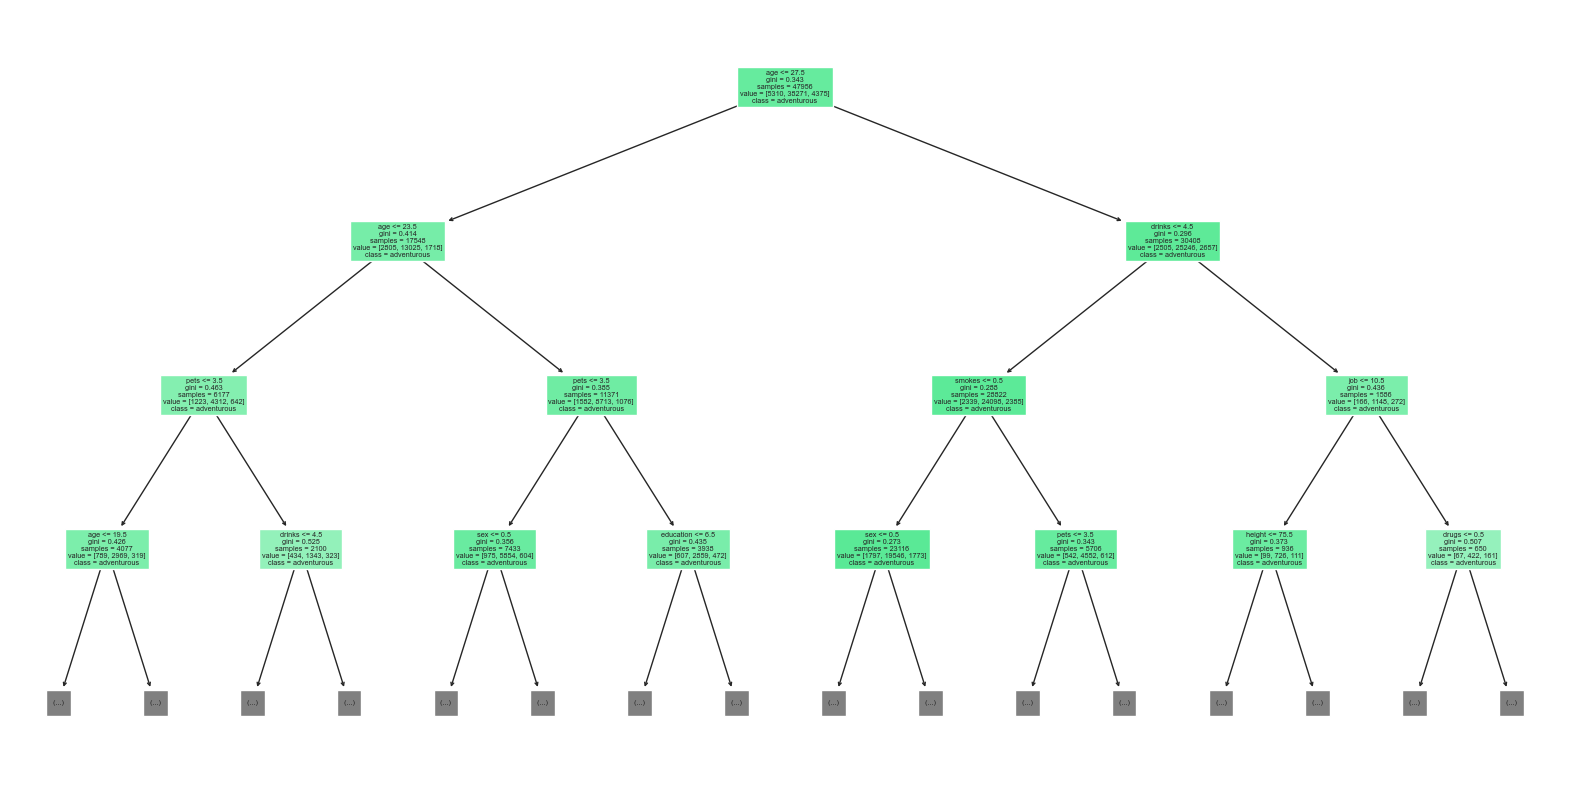

In [22]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=X.columns, class_names=clf2.classes_, max_depth=3)
plt.show()

In [23]:
clf2.feature_importances_

array([0.20270724, 0.01431193, 0.02357985, 0.01754653, 0.05277502,
       0.03075811, 0.07014597, 0.04394396, 0.04975041, 0.05217092,
       0.11631455, 0.02116733, 0.08658039, 0.02595917, 0.05015322,
       0.04849902, 0.03965867, 0.05397773])

In [25]:
df.to_csv("cleaned_cupid.csv")

In [26]:
X.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'offspring', 'pets', 'religion', 'smokes', 'speaks'],
      dtype='object')